<a href="https://colab.research.google.com/github/pt-yash-pandey/CHAT-PDF/blob/main/creative%20ads%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ads.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data set/TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data set/TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 88 files belonging to 2 classes.
Found 88 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=680,validation_data=validation_ds)


Epoch 1/10
3/3 [==============================] - 13s 2s/step - loss: 6.9348 - accuracy: 0.6364 - val_loss: 1.4371 - val_accuracy: 0.4886
Epoch 2/10
3/3 [==============================] - 1s 359ms/step - loss: 6.5868 - accuracy: 0.7273 - val_loss: 1.4974 - val_accuracy: 0.4659
Epoch 3/10
3/3 [==============================] - 1s 368ms/step - loss: 2.0908 - accuracy: 0.8409 - val_loss: 0.6526 - val_accuracy: 0.7159
Epoch 4/10
3/3 [==============================] - 1s 194ms/step - loss: 4.1936 - accuracy: 0.8636 - val_loss: 0.7881 - val_accuracy: 0.7045
Epoch 5/10
3/3 [==============================] - 1s 238ms/step - loss: 0.8758 - accuracy: 0.9205 - val_loss: 1.5742 - val_accuracy: 0.6023
Epoch 6/10
3/3 [==============================] - 1s 177ms/step - loss: 0.7443 - accuracy: 0.9545 - val_loss: 2.5823 - val_accuracy: 0.6250
Epoch 7/10
3/3 [==============================] - 1s 235ms/step - loss: 0.8410 - accuracy: 0.9432 - val_loss: 4.2076 - val_accuracy: 0.5795
Epoch 8/10
3/3 [======

In [ ]:
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)

NameError: name 'accuracy_score' is not defined

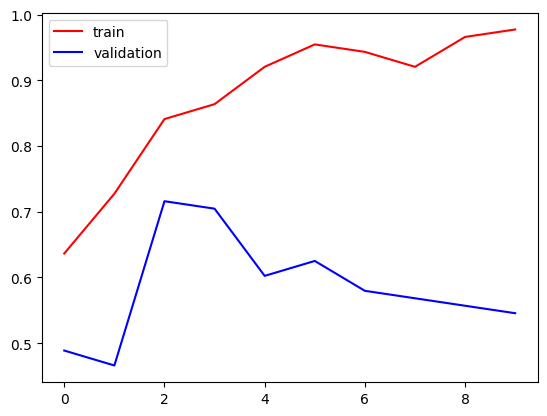

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

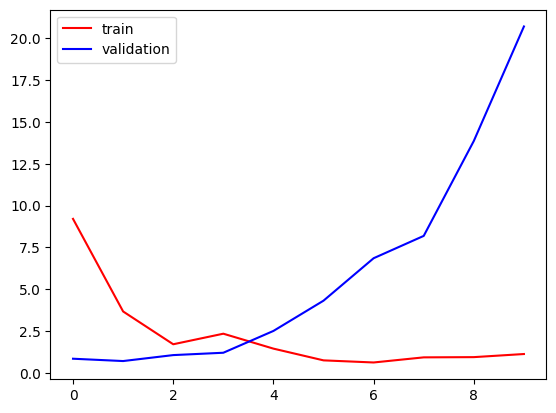

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/download (1).jpeg')

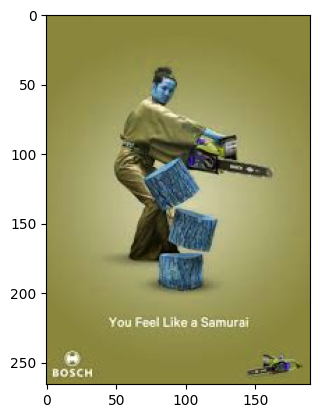

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(266, 190, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 368ms/step


array([[1.]], dtype=float32)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate a hypothetical dataset (replace this with your actual data)
X = np.random.randn(88, 2)  # 1000 samples, 5 features
y = np.random.randint(2, size=88)  # Binary labels (0 or 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Choose a threshold (adjust this based on your preference)
threshold = 0.5

# Convert probabilities to binary predictions using the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


Confusion Matrix:
[[ 0 11]
 [ 0  7]]
Precision: 0.3888888888888889
Recall: 1.0
F1 Score: 0.56
Cross-Validation F1 Scores: [0.64       0.58333333 0.71428571 0.58333333 0.69230769]
Mean CV F1 Score: 0.6426520146520147


In [ ]:
#array([[1.]], dtype=float32) = sds creative
#array([[0.]], dtype=float32) = ads not creative